In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
#mnist fashion 데이터 불러오기

fashion_mnist = keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [15]:
#데이터 shape 확인

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
# data split을 통해서 validation set 쪼개기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2,random_state=200)

In [17]:
#데이터 전처리 과정
# 1. input data 28*28*1
# 2. y data -> one hot encoding

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32') / 255

y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
y_val = tf.one_hot(y_val,10)

In [18]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [19]:
items = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
        'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [27]:
earlyStopping = keras.callbacks.EarlyStopping(patience=3)
checkpoint = keras.callbacks.ModelCheckpoint("best_model.hdf5", monitor='val_loss',
                             verbose=1, save_best_only=True)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint, earlyStopping],
                 batch_size=32, epochs=5)

Epoch 1/5
1500/1500 [==============================] - ETA: 0s - loss: 0.4995 - accuracy: 0.8219
Epoch 00001: val_loss improved from inf to 0.32565, saving model to best_model.hdf5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.4995 - accuracy: 0.8219 - val_loss: 0.3256 - val_accuracy: 0.8788
Epoch 2/5
1499/1500 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8780
Epoch 00002: val_loss improved from 0.32565 to 0.27475, saving model to best_model.hdf5
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3391 - accuracy: 0.8780 - val_loss: 0.2748 - val_accuracy: 0.8963
Epoch 3/5
1499/1500 [============================>.] - ETA: 0s - loss: 0.2853 - accuracy: 0.8966
Epoch 00003: val_loss improved from 0.27475 to 0.24664, saving model to best_model.hdf5
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2852 - accuracy: 0.8966 - val_loss: 0.2466 - val_accuracy: 0.9087
Epoch 4/5
1499/1500 [=======================

In [30]:
result = model.evaluate(x_test, y_test)

print("test loss, test acc : ", result)

313/313 [==============================] - 1s 5ms/step - loss: 0.2368 - accuracy: 0.9158
test loss, test acc :  [0.23683953285217285, 0.9157999753952026]


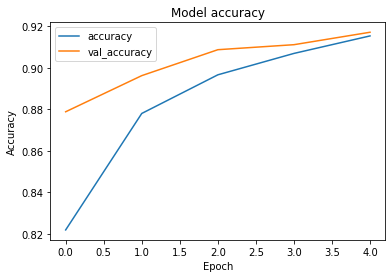

In [33]:
plt.figure()
plt.title("Model accuracy")
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

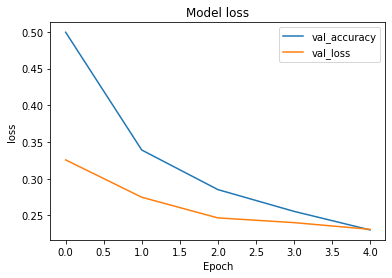

In [35]:
plt.figure()
plt.title("Model loss")
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['val_accuracy', 'val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

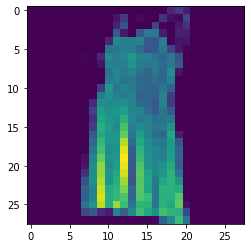

In [63]:
plt.imshow(x_val[50].reshape(28,28))

In [73]:
label_index = model.predict_classes(x_val[50].reshape(1,28,28,1))

In [78]:
items[label_index[0]]

'Dress'